In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    # plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    # plt.legend([string, 'val_'+string])
    plt.show()

In [7]:
df = pd.read_csv('Datasets/Raw_Dataset/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv')
df.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,16/02/2018 08:27:23,112640768,3,0,0,0,0,0,...,0,0,0,0,0,5.63e+07,138.593,56300000,56300000,Benign
1,0,0,16/02/2018 08:30:12,112641773,3,0,0,0,0,0,...,0,0,0,0,0,5.63e+07,263.751,56300000,56300000,Benign
2,35605,6,16/02/2018 08:26:55,20784143,23,44,2416,1344,240,64,...,20,2624734,0,2624734,2624734,9.05821e+06,0,9058214,9058214,Benign
3,0,0,16/02/2018 08:33:01,112640836,3,0,0,0,0,0,...,0,0,0,0,0,5.63e+07,82.0244,56300000,56300000,Benign
4,23,6,16/02/2018 08:27:59,20,1,1,0,0,0,0,...,20,0,0,0,0,0,0,0,0,Benign


In [8]:
features = ['Timestamp', 'Fwd Pkt Len Std', 'Fwd Pkt Len Mean',
       'Fwd Pkt Len Max', 'Fwd Seg Size Avg', 'Pkt Len Std', 'Flow IAT Std',
       'Bwd Pkt Len Std', 'Bwd Seg Size Avg', 'Pkt Size Avg',
       'Subflow Fwd Byts']

In [6]:
def targetify(s):
    if s == 'Benign':
        return 0
    else:
        return 1

In [10]:
df['Target']=df['Label'].apply(targetify)

In [11]:
X = df[features]
X[features] = X[features].apply(pd.to_numeric, errors='coerce', axis=1)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [12]:
y = df['Target']

In [13]:
X = X.fillna(0)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(838860, 11) (838860,)
(209715, 11) (209715,)


In [15]:
# selecting 1% of random rows for better running time

X_train2 = X_train.sample(frac=0.1, replace=True, random_state=1)
y_train2 = y_train.sample(frac=0.1, replace=True, random_state=1)
X_test2 = X_test.sample(frac=0.1, replace=True, random_state=1)
y_test2 = y_test.sample(frac=0.1, replace=True, random_state=1)
print (X_train2.shape, y_train2.shape)
print( X_test2.shape, y_test2.shape)

(83886, 11) (83886,)
(20972, 11) (20972,)


In [16]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_train2.values)
X_train2 = pd.DataFrame(x_scaled,columns=features)
x_scaled_test = min_max_scaler.fit_transform(X_test2.values)
X_test2 = pd.DataFrame(x_scaled_test,columns=features)
# y_scaled = min_max_scaler.fit_transform(y_train2.values)
# y_train2 = pd.DataFrame(y_scaled,columns=features)
# y_scaled_test = min_max_scaler.fit_transform(y_test2.values)
# y_test2 = pd.DataFrame(y_scaled_test,columns=features)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10, 64), # since it doesn't consider "words," the embedding doesn't really matter
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    # tf.keras.layers.Dense(1, activation='softmax') # loss too big
])

In [18]:
model.compile(loss='binary_crossentropy',
              # optimizer='sgd', # almost same
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [19]:
history = model.fit(X_train2.values, y_train2.values, epochs=10)

Train on 83886 samples
Epoch 1/10
83886/83886 [==============================] - 29s 351us/sample - loss: 0.0959 - accuracy: 0.9514
Epoch 2/10
83886/83886 [==============================] - 26s 305us/sample - loss: 0.0262 - accuracy: 0.9956
Epoch 3/10
83886/83886 [==============================] - 26s 308us/sample - loss: 0.0261 - accuracy: 0.9956
Epoch 4/10
83886/83886 [==============================] - 26s 308us/sample - loss: 0.0261 - accuracy: 0.9956
Epoch 5/10
83886/83886 [==============================] - 26s 312us/sample - loss: 0.0261 - accuracy: 0.9956
Epoch 6/10
83886/83886 [==============================] - 27s 328us/sample - loss: 0.0261 - accuracy: 0.9956
Epoch 7/10
83886/83886 [==============================] - 27s 325us/sample - loss: 0.0260 - accuracy: 0.9956
Epoch 8/10
83886/83886 [==============================] - 28s 332us/sample - loss: 0.0260 - accuracy: 0.9956
Epoch 9/10
83886/83886 [==============================] - 28s 336us/sample - loss: 0.0260 - accuracy: 0.9

In [1]:
# test_loss, test_acc = model.evaluate(X_test2.values, y_test2.values, batch_size=64)

# print('Test Loss: {}'.format(test_loss))
# print('Test Accuracy: {}'.format(test_acc))

In [42]:
predictions = model.predict(tf.expand_dims(X_test2.values, 0)[:,1])
print(predictions)

[[0.9932278]]


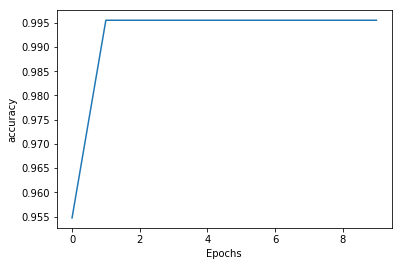

In [23]:
plot_graphs(history, 'accuracy')

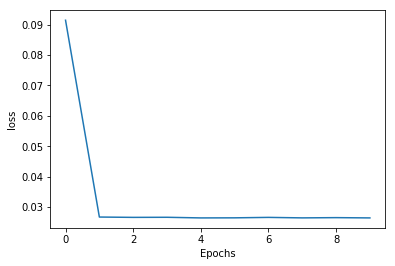

In [24]:
plot_graphs(history, 'loss')

In [59]:
# trying stacked LSTM layers

In [25]:
model_stack = tf.keras.Sequential([
    tf.keras.layers.Embedding(10, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
model_stack.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [27]:
history_stack = model_stack.fit(X_train2.values, y_train2.values, epochs=10)

Train on 83886 samples
Epoch 1/10
83886/83886 [==============================] - 51s 608us/sample - loss: 0.0871 - accuracy: 0.9602
Epoch 2/10
83886/83886 [==============================] - 47s 554us/sample - loss: 0.0286 - accuracy: 0.9955
Epoch 3/10
83886/83886 [==============================] - 47s 555us/sample - loss: 0.0286 - accuracy: 0.9955
Epoch 4/10
83886/83886 [==============================] - 46s 552us/sample - loss: 0.0288 - accuracy: 0.9955
Epoch 5/10
83886/83886 [==============================] - 45s 542us/sample - loss: 0.0287 - accuracy: 0.9955
Epoch 6/10
83886/83886 [==============================] - 46s 552us/sample - loss: 0.0284 - accuracy: 0.9955
Epoch 7/10
83886/83886 [==============================] - 45s 538us/sample - loss: 0.0283 - accuracy: 0.9955
Epoch 8/10
83886/83886 [==============================] - 46s 548us/sample - loss: 0.0286 - accuracy: 0.9955
Epoch 9/10
83886/83886 [==============================] - 46s 544us/sample - loss: 0.0283 - accuracy: 0.9

In [3]:
# test_loss, test_acc = model_stack.evaluate(X_test2.values, y_test2.values, batch_size=64)

# print('Test Loss: {}'.format(test_loss))
# print('Test Accuracy: {}'.format(test_acc))

In [2]:
predictions = model_stack.predict(tf.expand_dims(X_test2.values, 0)[:,1])
print(predictions)

NameError: name 'model_stack' is not defined

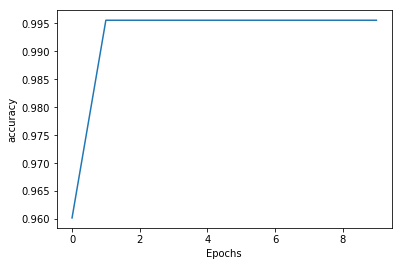

In [30]:
plot_graphs(history_stack, 'accuracy')

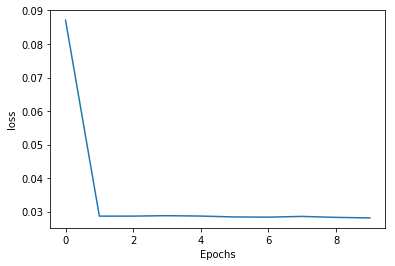

In [31]:
plot_graphs(history_stack, 'loss')

In [ ]:
# testing same model on different dataset

In [21]:
df = pd.read_csv('Datasets/Raw_Dataset/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv')
df.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,01/03/2018 08:17:11,115307855,5,0,0,0,0,0,...,0,1812348,0,1812348,1812348,56700000,6010057.622,61000000,52500000,Benign
1,0,0,01/03/2018 08:20:07,60997457,2,0,0,0,0,0,...,0,0,0,0,0,61000000,0,61000000,61000000,Benign
2,67,17,01/03/2018 08:17:18,61149019,5,0,1500,0,300,300,...,8,3530939,0,3530939,3530939,19200000,12500000,32600000,7999725,Benign
3,0,0,01/03/2018 08:22:09,60997555,2,0,0,0,0,0,...,0,0,0,0,0,61000000,0,61000000,61000000,Benign
4,0,0,01/03/2018 08:24:11,61997503,3,0,0,0,0,0,...,0,999909,0,999909,999909,61000000,0,61000000,61000000,Benign


In [22]:
features = ['Timestamp', 'Fwd Pkt Len Std', 'Fwd Pkt Len Mean',
       'Fwd Pkt Len Max', 'Fwd Seg Size Avg', 'Pkt Len Std', 'Flow IAT Std',
       'Bwd Pkt Len Std', 'Bwd Seg Size Avg', 'Pkt Size Avg',
       'Subflow Fwd Byts']

In [11]:
df['Target']=df['Label'].apply(targetify)

In [12]:
X = df[features]
X[features] = X[features].apply(pd.to_numeric, errors='coerce', axis=1)

C:\Users\young\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [13]:
y = df['Target']
X = X.fillna(0)

In [14]:
X_train_TH, X_test_TH, y_train_TH, y_test_TH = train_test_split(X, y, test_size=0.2)
print (X_train_TH.shape, y_train_TH.shape)
print( X_test_TH.shape, y_test_TH.shape)

(264900, 47) (264900,)
(66225, 47) (66225,)


In [15]:
# selecting 10% of random rows for better running time
X_train_TH = X_train_TH.sample(frac=0.1, replace=True, random_state=1)
y_train_TH = y_train_TH.sample(frac=0.1, replace=True, random_state=1)
X_test_TH = X_test_TH.sample(frac=0.1, replace=True, random_state=1)
y_test_TH = y_test_TH.sample(frac=0.1, replace=True, random_state=1)
print (X_train_TH.shape, y_train_TH.shape)
print( X_test_TH.shape, y_test_TH.shape)

(26490, 47) (26490,)
(6622, 47) (6622,)


In [16]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_TH = min_max_scaler.fit_transform(X_train_TH.values)
X_train_TH = pd.DataFrame(x_scaled_TH,columns=features)
x_scaled_test_TH = min_max_scaler.fit_transform(X_test_TH.values)
X_test_TH = pd.DataFrame(x_scaled_test_TH,columns=features)

In [44]:
# predict using bidirectional LSTM model trained at first
predictions_TH = model.predict(tf.expand_dims(X_test_TH.values, 0)[:,1])
print(predictions_TH)

[[0.9932278]]


In [35]:
# ...how did i get the same accuracy? how is it 0.9932278???
# ok now will build another model using this thursday dataset....

In [17]:
model_TH = tf.keras.Sequential([
    tf.keras.layers.Embedding(10, 64), # since it doesn't consider "words," the embedding doesn't really matter
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    # tf.keras.layers.Dense(1, activation='softmax') # loss too big
])

In [18]:
model_TH.compile(loss='binary_crossentropy',
              # optimizer='sgd', # almost same
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [19]:
history_TH = model_TH.fit(X_train_TH.values, y_train_TH.values, epochs=10)

Train on 26490 samples
Epoch 1/10
26490/26490 [==============================] - 29s 1ms/sample - loss: 0.6002 - accuracy: 0.7148
Epoch 2/10
26490/26490 [==============================] - 25s 942us/sample - loss: 0.5953 - accuracy: 0.7179
Epoch 3/10
26490/26490 [==============================] - 26s 984us/sample - loss: 0.5951 - accuracy: 0.7179
Epoch 4/10
26490/26490 [==============================] - 26s 986us/sample - loss: 0.5954 - accuracy: 0.7179
Epoch 5/10
26490/26490 [==============================] - 26s 1000us/sample - loss: 0.5946 - accuracy: 0.7179
Epoch 6/10
26490/26490 [==============================] - 27s 1ms/sample - loss: 0.5922 - accuracy: 0.7179
Epoch 7/10
26490/26490 [==============================] - 30s 1ms/sample - loss: 0.5902 - accuracy: 0.7179
Epoch 8/10
26490/26490 [==============================] - 28s 1ms/sample - loss: 0.5901 - accuracy: 0.7179
Epoch 9/10
26490/26490 [==============================] - 26s 967us/sample - loss: 0.5899 - accuracy: 0.7179
Epo

In [20]:
predictions_TH2 = model_TH.predict(tf.expand_dims(X_test_TH.values, 0)[:,1])
print(predictions_TH2)

[[0.25054717]]


In [41]:
predictions_ori = model_TH.predict(tf.expand_dims(X_test2.values, 0)[:,1])
print(predictions_ori)

[[0.30029982]]


In [43]:
# so i get the same accuracy again no matter what testset i use.... hmm
# anyway why is the new model so bad? did the feature importance change dramatically?
# let's run the feature_importance for this dataset and select the top 10 from Young_Features...

In [3]:
df = pd.read_csv('Datasets/Raw_Dataset/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv')
df.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,01/03/2018 08:17:11,115307855,5,0,0,0,0,0,...,0,1812348,0,1812348,1812348,56700000,6010057.622,61000000,52500000,Benign
1,0,0,01/03/2018 08:20:07,60997457,2,0,0,0,0,0,...,0,0,0,0,0,61000000,0,61000000,61000000,Benign
2,67,17,01/03/2018 08:17:18,61149019,5,0,1500,0,300,300,...,8,3530939,0,3530939,3530939,19200000,12500000,32600000,7999725,Benign
3,0,0,01/03/2018 08:22:09,60997555,2,0,0,0,0,0,...,0,0,0,0,0,61000000,0,61000000,61000000,Benign
4,0,0,01/03/2018 08:24:11,61997503,3,0,0,0,0,0,...,0,999909,0,999909,999909,61000000,0,61000000,61000000,Benign


In [4]:
features = ["Subflow Bwd Pkts",
    "Subflow Fwd Pkts",
    "Down/Up Ratio",
    "Idle Min",
    "TotLen Bwd Pkts",
    "Idle Mean",
    "Bwd IAT Std",
    "Bwd IAT Min",
    "Bwd IAT Mean",
    "Tot Fwd Pkts",
    "Idle Max",
    "Fwd IAT Min",
    "Bwd IAT Max",
    "Tot Bwd Pkts",
    "Pkt Len Mean",
    "Bwd IAT Tot",
    "ACK Flag Cnt",
    "Init Bwd Win Byts",
    "Subflow Fwd Byts",
    "Fwd IAT Mean",
    "PSH Flag Cnt",
    "Flow Byts/s",
    "Fwd IAT Std",
    "Bwd Pkt Len Std",
    "Bwd Pkt Len Mean",
    "Bwd Seg Size Avg",
    "Flow IAT Min",
    "Pkt Len Max",
    "Bwd Pkts/s",
    "Fwd IAT Tot",
    "Pkt Size Avg",
    "Fwd Pkts/s",
    "Flow IAT Std",
    "Flow Pkts/s",
    "TotLen Fwd Pkts",
    "Bwd Pkt Len Max",
    "Fwd IAT Max",
    "Pkt Len Var",
    "Flow IAT Max",
    "Init Fwd Win Byts",
    "Flow Duration",
    "Flow IAT Mean",
    "Fwd Pkt Len Max",
    "Fwd Pkt Len Mean",
    "Pkt Len Std",
    "Fwd Seg Size Avg",
    "Fwd Pkt Len Std"]